# Appliances with occasional use

There are some appliances that are occasionally included in the mix of
appliances that the user switches on during the day. For example, an iron,
a stereo, printers, etc.

Within RAMP, the user may specify the probability of using an appliance
on the daily mix with a parameter called **occasional_use**.

When `occasional_use = 0`, the appliance is always present in the mix, and
when `occasional_use = 1`,  the appliance is never present. Any in-between
values will lead to a probabilistic calculation to decide whether the appliance
is used or not on a given day.

The following example investigates the effect of this parameter by modelling two user categories:
* A household that uses a computer occasionally
* A school that uses the computer every day

In [1]:
# importing functions
from ramp import User, UseCase, get_day_type
import pandas as pd

### Creating user categories and appliances

In [2]:
household = User("Household")
school = User("School")

In [3]:
computer_0 = household.add_appliance(
    name="Household Computer",
    number=1,
    power=50,
    num_windows=1,
    func_time=210,
    occasional_use=0.5,  # 50% chance of occasional use,
    window_1=[510, 750],
)

In [4]:
computer_1 = school.add_appliance(
    name="School Computer",
    number=1,
    power=50,
    num_windows=1,
    func_time=210,
    time_fraction_random_variability=0.2,
    func_cycle=10,
    occasional_use=1,  # always present in the mix of appliances,
    window_1=[510, 750],
)

<Axes: >

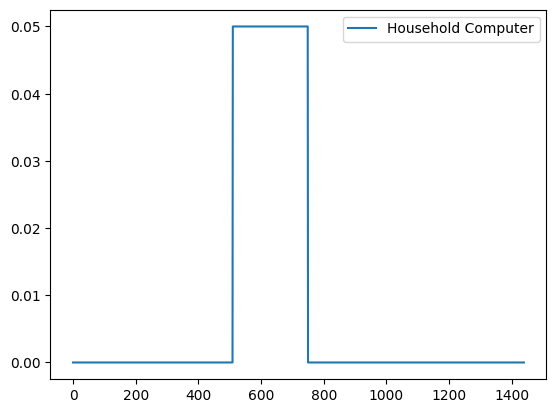

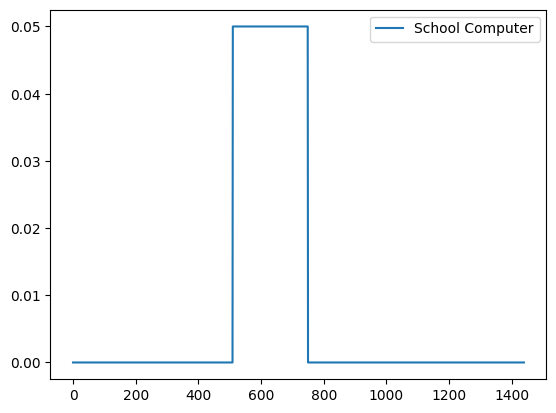

In [5]:
# Checking the maximum profile of the two appliances

max_profile_c1 = pd.DataFrame(computer_0.maximum_profile, columns=[computer_0.name])
max_profile_c2 = pd.DataFrame(computer_1.maximum_profile, columns=[computer_1.name])

max_profile_c1.plot()
max_profile_c2.plot()

### Generating profiles

In [6]:
use_case = UseCase(users=[household, school])
use_case.initialize(5)

You will simulate 5 day(s) from 2023-12-01 00:00:00 until 2023-12-06 00:00:00


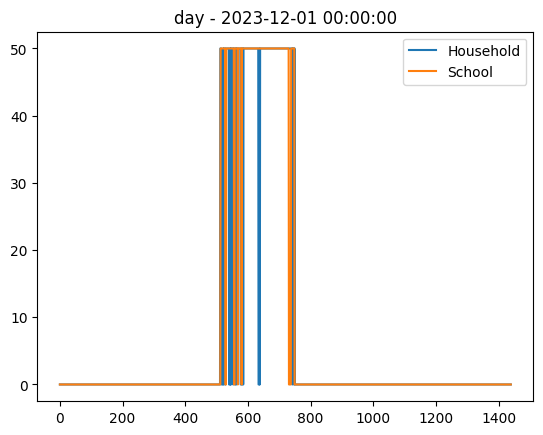

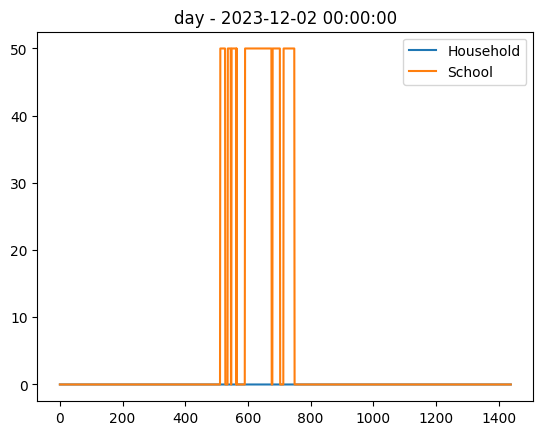

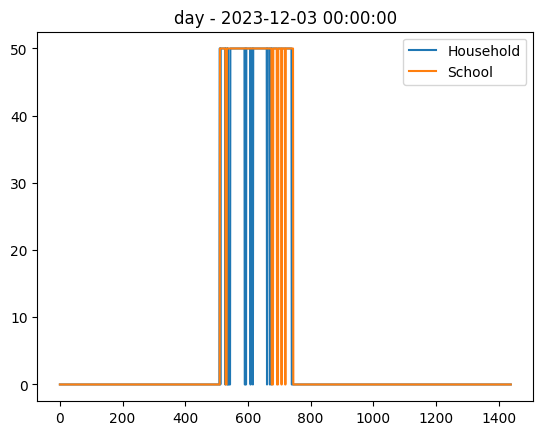

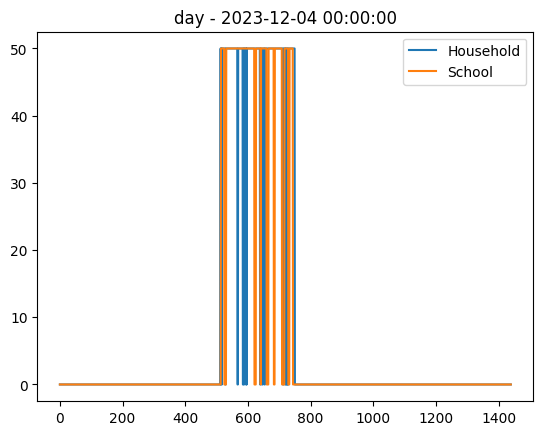

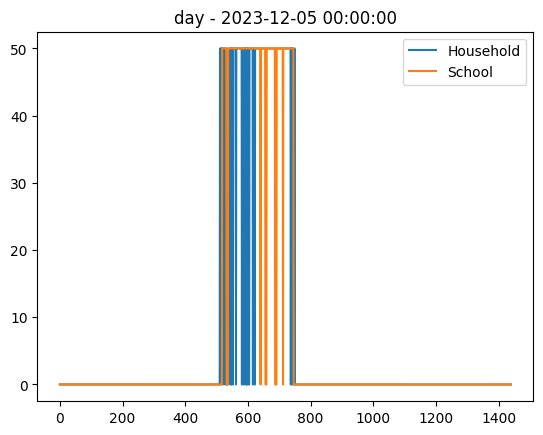

In [7]:
for day_idx, day in enumerate(use_case.days):
    household_profile = household.generate_single_load_profile(
        prof_i=day_idx, day_type=get_day_type(day)
    )

    school_profile = school.generate_single_load_profile(
        prof_i=day_idx, day_type=get_day_type(day)
    )

    pd.DataFrame(
        data=[household_profile, school_profile],
        columns=range(1440),
        index=[household.user_name, school.user_name],
    ).T.plot(title=f"day - {day}")

As it can be seen from the figures, the computer is always present in
the school's appliance mix while, for the household, it is only occasionally 
present.